# K Nearest Neighborns

In [19]:
df = read.csv("../Social_Network_Ads.csv")
df = df[3:5]

In [20]:
# divido el conjunto en entrenamiento y testing
library(caTools)
set.seed(123)
split = sample.split(df$Purchased, SplitRatio = 1/4)
trainSet = subset(df, split==FALSE) 
testSet = subset(df, split==TRUE) 

In [21]:
# dado que las variables tienen magnitudes muy diferentes (edades y sueldos), hay que escalarlas pa dejarlas en la misma escala
trainSet[1:2] = scale(trainSet[1:2])
testSet[1:2] = scale(testSet[1:2])

In [22]:
# esta libreria permite usar la funcion knn con la que permite utilizar el metodo deseado
# la funcion da altiro las predicciones
library(class)
y_pred = knn(train = trainSet[, -3], # esto quiere decir todas las columnas menos la tercera
        test = testSet[, -3],
        cl = trainSet[, 3],
        k = 5) # quiero que el knn use 5 vecinos
y_pred

[1] 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 [75] 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0
Levels: 0 1

In [23]:
# vemos que tan bien fueron los resultados con la matriz de confusion
y_test = testSet[, 3]
confusionM = table(y_test, y_pred)
confusionM

      y_pred
y_test  0  1
     0 58  6
     1  5 31

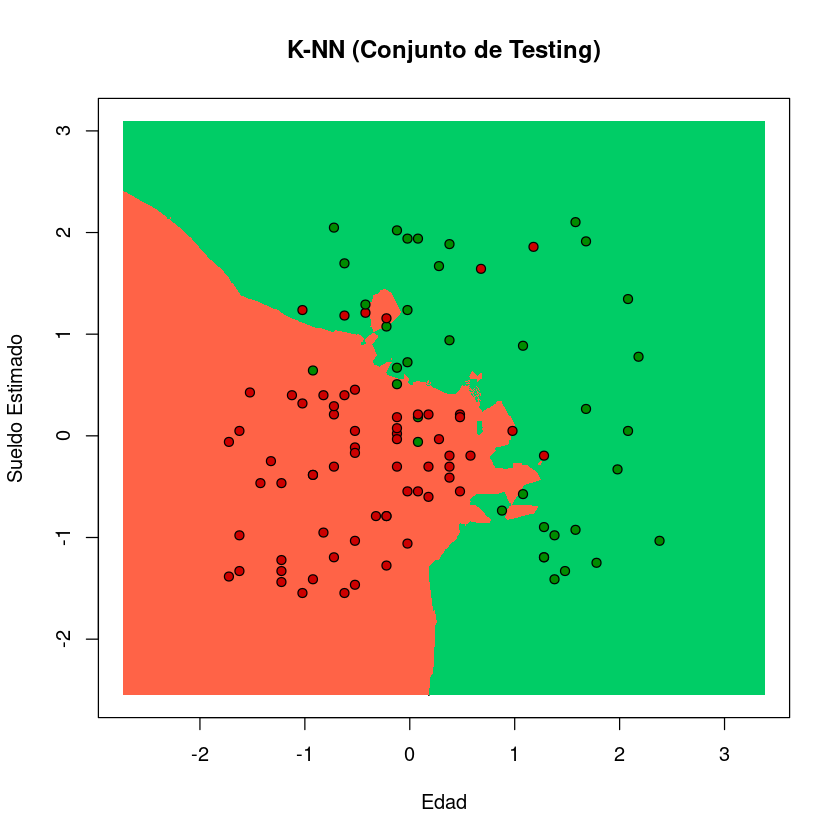

In [24]:
# nuevamente, no encontré una mejor forma de graficar esto en R asi que lo copio del curso ml a-z
# Visualización del conjunto de testing
set = testSet
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = trainSet[,-3],
             test = grid_set,
             cl = trainSet[,3],
             k = 5)
plot(set[, -3],
     main = 'K-NN (Conjunto de Testing)',
     xlab = 'Edad', ylab = 'Sueldo Estimado',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

notamos que en este resultado hay unas islitas de color rojo, eso es porque en esa zona hay más puntos rojos cerca que puntos verdes